In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")
import pickle

In [3]:
!pip install scipy

^C


In [2]:
data=pd.read_csv("insurance_claims.csv")
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
data.replace("?",np.nan,inplace=True)

In [4]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                     NaN               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [5]:
data.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

## Exprotary data analysis

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [8]:
data.drop(["policy_bind_date"], axis=1, inplace=True)
data.head()


months_as_customer  age  policy_number policy_state policy_csl  \
0                 328   48         521585           OH    250/500   
1                 228   42         342868           IN    250/500   
2                 134   29         687698           OH    100/300   
3                 256   41         227811           IL    250/500   
4                 228   44         367455           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex  ... police_report_available total_claim_amount injury_claim  \
0        MALE  ...                     YES              71610         6510   
1        MALE  ...                     NaN               5070          780   
2      FEMALE  ...                      NO              34650         7700   
3      FEMALE  ...                      NO              63400         6340   
4        MALE  ...                      NO               6500         1300   

  property_claim  vehicle_claim  auto_make auto_model auto_year  \
0          13020          52080       Saab        92x      2004   
1            780           3510   Mercedes       E400      2007   
2           3850          23100      Dodge        RAM      2007   
3           6340          50720  Chevrolet      Tahoe      2014   
4            650           4550     Accura        RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 39 columns]

In [9]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries             

<function matplotlib.pyplot.show(close=None, block=None)>

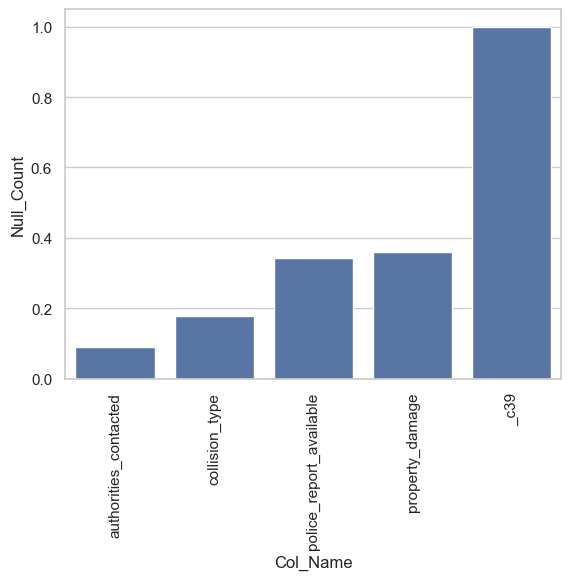

In [10]:
missing=data.isnull().sum()/len(data)
missing =missing[missing>0]
missing.sort_values(inplace=True)
missing=missing.to_frame()
missing.columns=["Null_Count"]
missing.index.names=["Col_Name"]
missing=missing.reset_index()
sns.set(style="whitegrid",color_codes=True)
sns.barplot(x='Col_Name',y='Null_Count',data=missing)
plt.xticks(rotation=90)
plt.show

In [11]:
data["collision_type"]=data["collision_type"].fillna(data["collision_type"].mode()[0])

In [12]:
data["police_report_available"]=data["police_report_available"].fillna(data["police_report_available"].mode()[0])

In [13]:
data["property_damage"]=data["property_damage"].fillna(data["property_damage"].mode()[0])

In [14]:
data.head()

months_as_customer  age  policy_number policy_state policy_csl  \
0                 328   48         521585           OH    250/500   
1                 228   42         342868           IN    250/500   
2                 134   29         687698           OH    100/300   
3                 256   41         227811           IL    250/500   
4                 228   44         367455           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex  ... police_report_available total_claim_amount injury_claim  \
0        MALE  ...                     YES              71610         6510   
1        MALE  ...                      NO               5070          780   
2      FEMALE  ...                      NO              34650         7700   
3      FEMALE  ...                      NO              63400         6340   
4        MALE  ...                      NO               6500         1300   

  property_claim  vehicle_claim  auto_make auto_model auto_year  \
0          13020          52080       Saab        92x      2004   
1            780           3510   Mercedes       E400      2007   
2           3850          23100      Dodge        RAM      2007   
3           6340          50720  Chevrolet      Tahoe      2014   
4            650           4550     Accura        RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 39 columns]

In [15]:
data['policy_state'].value_counts()

policy_state
OH    352
IL    338
IN    310
Name: count, dtype: int64

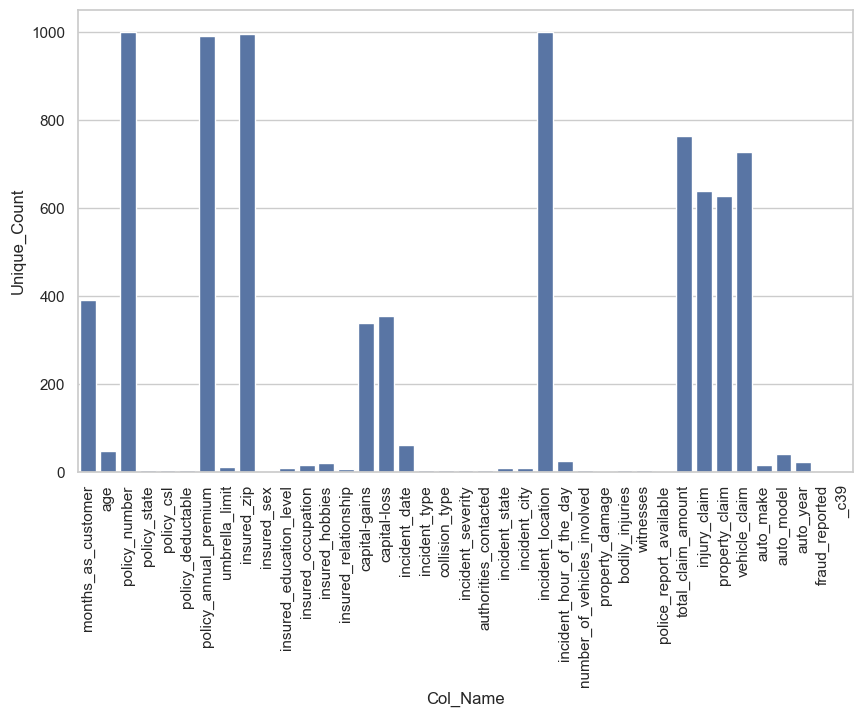

In [16]:
unique = data.nunique().to_frame()
unique.columns = ["count"]
unique.index.names = ['ColName']
unique = unique.reset_index()

# Renaming the columns to match with your plotting code
unique.columns = ['Col_Name', 'Unique_Count']

# Creating the bar plot
sns.set(style="whitegrid", color_codes=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Col_Name', y='Unique_Count', data=unique)
plt.xticks(rotation=90)
plt.show()

In [17]:
to_drop=['policy_number','insured_zip','policy_state','incident_location','incident_date','incident_state','policy_csl','incident_city','insured_hobbies','auto_make','auto_model','auto_year','_c39']


In [18]:
data.drop(to_drop, inplace=True,axis=1)

In [19]:
data.head()

ColName  months_as_customer  age  policy_deductable  policy_annual_premium  \
0                       328   48               1000                1406.91   
1                       228   42               2000                1197.22   
2                       134   29               2000                1413.14   
3                       256   41               2000                1415.74   
4                       228   44               1000                1583.91   

ColName  umbrella_limit insured_sex insured_education_level  \
0                     0        MALE                      MD   
1               5000000        MALE                      MD   
2               5000000      FEMALE                     PhD   
3               6000000      FEMALE                     PhD   
4               6000000        MALE               Associate   

ColName insured_occupation insured_relationship  capital-gains  ...  \
0             craft-repair              husband          53300  ...   
1        machine-op-inspct       other-relative              0  ...   
2                    sales            own-child          35100  ...   
3             armed-forces            unmarried          48900  ...   
4                    sales            unmarried          66000  ...   

ColName  number_of_vehicles_involved property_damage bodily_injuries  \
0                                  1             YES               1   
1                                  1              NO               0   
2                                  3              NO               2   
3                                  1              NO               1   
4                                  1              NO               0   

ColName witnesses police_report_available  total_claim_amount  injury_claim  \
0               2                     YES               71610          6510   
1               0                      NO                5070           780   
2               3                      NO               34650          7700   
3               2                      NO               63400          6340   
4               1                      NO                6500          1300   

ColName property_claim  vehicle_claim  fraud_reported  
0                13020          52080               Y  
1                  780           3510               Y  
2                 3850          23100               N  
3                 6340          50720               Y  
4                  650           4550               N  

[5 rows x 26 columns]

In [20]:
data['insured_sex'].value_counts()

insured_sex
FEMALE    537
MALE      463
Name: count, dtype: int64

In [21]:
data['insured_sex'].replace({"MALE":0,'FEMALE':1},inplace = True)

In [22]:
data

ColName  months_as_customer  age  policy_deductable  policy_annual_premium  \
0                       328   48               1000                1406.91   
1                       228   42               2000                1197.22   
2                       134   29               2000                1413.14   
3                       256   41               2000                1415.74   
4                       228   44               1000                1583.91   
..                      ...  ...                ...                    ...   
995                       3   38               1000                1310.80   
996                     285   41               1000                1436.79   
997                     130   34                500                1383.49   
998                     458   62               2000                1356.92   
999                     456   60               1000                 766.19   

ColName  umbrella_limit  insured_sex insured_education_level  \
0                     0            0                      MD   
1               5000000            0                      MD   
2               5000000            1                     PhD   
3               6000000            1                     PhD   
4               6000000            0               Associate   
..                  ...          ...                     ...   
995                   0            1                 Masters   
996                   0            1                     PhD   
997             3000000            1                 Masters   
998             5000000            0               Associate   
999                   0            1               Associate   

ColName insured_occupation insured_relationship  capital-gains  ...  \
0             craft-repair              husband          53300  ...   
1        machine-op-inspct       other-relative              0  ...   
2                    sales            own-child          35100  ...   
3             armed-forces            unmarried          48900  ...   
4                    sales            unmarried          66000  ...   
..                     ...                  ...            ...  ...   
995           craft-repair            unmarried              0  ...   
996         prof-specialty                 wife          70900  ...   
997           armed-forces       other-relative          35100  ...   
998      handlers-cleaners                 wife              0  ...   
999                  sales              husband              0  ...   

ColName  number_of_vehicles_involved property_damage bodily_injuries  \
0                                  1             YES               1   
1                                  1              NO               0   
2                                  3              NO               2   
3                                  1              NO               1   
4                                  1              NO               0   
..                               ...             ...             ...   
995                                1             YES               0   
996                                1             YES               2   
997                                3              NO               2   
998                                1              NO               0   
999                                1              NO               0   

ColName witnesses police_report_available  total_claim_amount  injury_claim  \
0               2                     YES               71610          6510   
1               0                      NO                5070           780   
2               3                      NO               34650          7700   
3               2                      NO               63400          6340   
4               1                      NO                6500          1300   
..            ...                     ...                 ...           ...   
995             1      

In [23]:
data['insured_education_level'].value_counts()

insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: count, dtype: int64

In [24]:
data['insured_occupation'].value_counts()

insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: count, dtype: int64

In [25]:
data['property_damage'].value_counts()

property_damage
NO     698
YES    302
Name: count, dtype: int64

In [26]:
data['property_damage'].replace({"NO":0,'YES':1},inplace = True)

In [27]:
data

ColName  months_as_customer  age  policy_deductable  policy_annual_premium  \
0                       328   48               1000                1406.91   
1                       228   42               2000                1197.22   
2                       134   29               2000                1413.14   
3                       256   41               2000                1415.74   
4                       228   44               1000                1583.91   
..                      ...  ...                ...                    ...   
995                       3   38               1000                1310.80   
996                     285   41               1000                1436.79   
997                     130   34                500                1383.49   
998                     458   62               2000                1356.92   
999                     456   60               1000                 766.19   

ColName  umbrella_limit  insured_sex insured_education_level  \
0                     0            0                      MD   
1               5000000            0                      MD   
2               5000000            1                     PhD   
3               6000000            1                     PhD   
4               6000000            0               Associate   
..                  ...          ...                     ...   
995                   0            1                 Masters   
996                   0            1                     PhD   
997             3000000            1                 Masters   
998             5000000            0               Associate   
999                   0            1               Associate   

ColName insured_occupation insured_relationship  capital-gains  ...  \
0             craft-repair              husband          53300  ...   
1        machine-op-inspct       other-relative              0  ...   
2                    sales            own-child          35100  ...   
3             armed-forces            unmarried          48900  ...   
4                    sales            unmarried          66000  ...   
..                     ...                  ...            ...  ...   
995           craft-repair            unmarried              0  ...   
996         prof-specialty                 wife          70900  ...   
997           armed-forces       other-relative          35100  ...   
998      handlers-cleaners                 wife              0  ...   
999                  sales              husband              0  ...   

ColName  number_of_vehicles_involved property_damage bodily_injuries  \
0                                  1               1               1   
1                                  1               0               0   
2                                  3               0               2   
3                                  1               0               1   
4                                  1               0               0   
..                               ...             ...             ...   
995                                1               1               0   
996                                1               1               2   
997                                3               0               2   
998                                1               0               0   
999                                1               0               0   

ColName witnesses police_report_available  total_claim_amount  injury_claim  \
0               2                     YES               71610          6510   
1               0                      NO                5070           780   
2               3                      NO               34650          7700   
3               2                      NO               63400          6340   
4               1                      NO                6500          1300   
..            ...                     ...                 ...           ...   
995             1      

In [28]:
data['police_report_available'].value_counts()

police_report_available
NO     686
YES    314
Name: count, dtype: int64

In [29]:
data['police_report_available'].replace({'NO':0,"YES":1},inplace = True)

In [30]:
data

ColName  months_as_customer  age  policy_deductable  policy_annual_premium  \
0                       328   48               1000                1406.91   
1                       228   42               2000                1197.22   
2                       134   29               2000                1413.14   
3                       256   41               2000                1415.74   
4                       228   44               1000                1583.91   
..                      ...  ...                ...                    ...   
995                       3   38               1000                1310.80   
996                     285   41               1000                1436.79   
997                     130   34                500                1383.49   
998                     458   62               2000                1356.92   
999                     456   60               1000                 766.19   

ColName  umbrella_limit  insured_sex insured_education_level  \
0                     0            0                      MD   
1               5000000            0                      MD   
2               5000000            1                     PhD   
3               6000000            1                     PhD   
4               6000000            0               Associate   
..                  ...          ...                     ...   
995                   0            1                 Masters   
996                   0            1                     PhD   
997             3000000            1                 Masters   
998             5000000            0               Associate   
999                   0            1               Associate   

ColName insured_occupation insured_relationship  capital-gains  ...  \
0             craft-repair              husband          53300  ...   
1        machine-op-inspct       other-relative              0  ...   
2                    sales            own-child          35100  ...   
3             armed-forces            unmarried          48900  ...   
4                    sales            unmarried          66000  ...   
..                     ...                  ...            ...  ...   
995           craft-repair            unmarried              0  ...   
996         prof-specialty                 wife          70900  ...   
997           armed-forces       other-relative          35100  ...   
998      handlers-cleaners                 wife              0  ...   
999                  sales              husband              0  ...   

ColName  number_of_vehicles_involved property_damage bodily_injuries  \
0                                  1               1               1   
1                                  1               0               0   
2                                  3               0               2   
3                                  1               0               1   
4                                  1               0               0   
..                               ...             ...             ...   
995                                1               1               0   
996                                1               1               2   
997                                3               0               2   
998                                1               0               0   
999                                1               0               0   

ColName witnesses police_report_available  total_claim_amount  injury_claim  \
0               2                       1               71610          6510   
1               0                       0                5070           780   
2               3                       0               34650          7700   
3               2                       0               63400          6340   
4               1                       0                6500          1300   
..            ...                     ...                 ...           ...   
995             1      

In [31]:
data['fraud_reported'].value_counts()

fraud_reported
N    753
Y    247
Name: count, dtype: int64

In [32]:
data['fraud_reported'].replace({"N":0,'Y':1},inplace = True)

In [33]:
data.head()

ColName  months_as_customer  age  policy_deductable  policy_annual_premium  \
0                       328   48               1000                1406.91   
1                       228   42               2000                1197.22   
2                       134   29               2000                1413.14   
3                       256   41               2000                1415.74   
4                       228   44               1000                1583.91   

ColName  umbrella_limit  insured_sex insured_education_level  \
0                     0            0                      MD   
1               5000000            0                      MD   
2               5000000            1                     PhD   
3               6000000            1                     PhD   
4               6000000            0               Associate   

ColName insured_occupation insured_relationship  capital-gains  ...  \
0             craft-repair              husband          53300  ...   
1        machine-op-inspct       other-relative              0  ...   
2                    sales            own-child          35100  ...   
3             armed-forces            unmarried          48900  ...   
4                    sales            unmarried          66000  ...   

ColName  number_of_vehicles_involved property_damage bodily_injuries  \
0                                  1               1               1   
1                                  1               0               0   
2                                  3               0               2   
3                                  1               0               1   
4                                  1               0               0   

ColName witnesses police_report_available  total_claim_amount  injury_claim  \
0               2                       1               71610          6510   
1               0                       0                5070           780   
2               3                       0               34650          7700   
3               2                       0               63400          6340   
4               1                       0                6500          1300   

ColName  property_claim  vehicle_claim  fraud_reported  
0                 13020          52080               1  
1                   780           3510               1  
2                  3850          23100               0  
3                  6340          50720               1  
4                   650           4550               0  

[5 rows x 26 columns]

In [34]:
categorical_cols=data.select_dtypes(include=['object'])
categorical_cols=pd.get_dummies(categorical_cols,drop_first=True,dtype=int)
categorical_cols.head()

insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            1   
3                                0                            1   
4                                0                            0   

   insured_occupation_armed-forces  insured_occupation_craft-repair  \
0                                0                                1   
1                                0                                0   
2                                0                                0   
3                                1                                0   
4                                0                                0   

   insured_occupation_exec-managerial  insured_occupation_farming-fishing  \
0                                   0                                   0   
1                                   0                                   0   
2                                   0                                   0   
3                                   0                                   0   
4                                   0                                   0   

   ...  incident_type_Single Vehicle Collision  incident_type_Vehicle Theft  \
0  ...                                       1                            0   
1  ...                                       0                            1   
2  ...                                       0                            0   
3  ...                                       1                            0   
4  ...                                       0                            1   

   collision_type_Rear Collision  collision_type_Side Collision  \
0                              0                              1   
1                              1                              0   
2                              1                              0   
3                              0                              0   
4                              1                              0   

   incident_severity_Minor Damage  incident_severity_Total Loss  \
0                               0                             0   
1                               1                             0   
2                               1                             0   
3                               0                             0   
4                               1                             0   

   incident_severity_Trivial Damage  authorities_contacted_Fire  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   authorities_contacted_Other  authorities_contacted_Police  
0                            0                             1  
1                            0                             1  
2                  

In [35]:
numerical_cols=data.select_dtypes(include=['int64'])
numerical_cols

ColName  months_as_customer  age  policy_deductable  umbrella_limit  \
0                       328   48               1000               0   
1                       228   42               2000         5000000   
2                       134   29               2000         5000000   
3                       256   41               2000         6000000   
4                       228   44               1000         6000000   
..                      ...  ...                ...             ...   
995                       3   38               1000               0   
996                     285   41               1000               0   
997                     130   34                500         3000000   
998                     458   62               2000         5000000   
999                     456   60               1000               0   

ColName  insured_sex  capital-gains  capital-loss  incident_hour_of_the_day  \
0                  0          53300             0                         5   
1                  0              0             0                         8   
2                  1          35100             0                         7   
3                  1          48900        -62400                         5   
4                  0          66000        -46000                        20   
..               ...            ...           ...                       ...   
995                1              0             0                        20   
996                1          70900             0                        23   
997                1          35100             0                         4   
998                0              0             0                         2   
999                1              0             0                         6   

ColName  number_of_vehicles_involved  property_damage  bodily_injuries  \
0                                  1                1                1   
1                                  1                0                0   
2                                  3                0                2   
3                                  1                0                1   
4                                  1                0                0   
..                               ...              ...              ...   
995                                1                1                0   
996                                1                1                2   
997                                3                0                2   
998                                1                0                0   
999                                1                0                0   

ColName  witnesses  police_report_available  total_claim_amount  injury_claim  \
0                2                        1               71610          6510   
1                0                        0                5070           780   
2                3                        0               34650          7700   
3                2                        0               63400          6340   
4                1                        0                6500          1300   
..             ...                      ...                 ...           ...   
995              1                        0               87200         17440   
996              3                        0              108480         18080   
997              3                        1               67500          7500   
998              1                        1               46980          5220   
999              3                        0                5060           460   

ColName  property_claim  vehicle_claim  fraud_reported  
0                 13020          52080               1  
1                   780           3510               1  
2                  3850          23100               0  
3                  6340          50720               1  
4                   650           4550             

In [36]:
df=pd.concat([numerical_cols,categorical_cols],axis=1)
df

months_as_customer  age  policy_deductable  umbrella_limit  insured_sex  \
0                   328   48               1000               0            0   
1                   228   42               2000         5000000            0   
2                   134   29               2000         5000000            1   
3                   256   41               2000         6000000            1   
4                   228   44               1000         6000000            0   
..                  ...  ...                ...             ...          ...   
995                   3   38               1000               0            1   
996                 285   41               1000               0            1   
997                 130   34                500         3000000            1   
998                 458   62               2000         5000000            0   
999                 456   60               1000               0            1   

     capital-gains  capital-loss  incident_hour_of_the_day  \
0            53300             0                         5   
1                0             0                         8   
2            35100             0                         7   
3            48900        -62400                         5   
4            66000        -46000                        20   
..             ...           ...                       ...   
995              0             0                        20   
996          70900             0                        23   
997          35100             0                         4   
998              0             0                         2   
999              0             0                         6   

     number_of_vehicles_involved  property_damage  ...  \
0                              1                1  ...   
1                              1                0  ...   
2                              3                0  ...   
3                              1                0  ...   
4                              1                0  ...   
..                           ...              ...  ...   
995                            1                1  ...   
996                            1                1  ...   
997                            3                0  ...   
998                            1                0  ...   
999                            1                0  ...   

     incident_type_Single Vehicle Collision  incident_type_Vehicle Theft  \
0                                         1                            0   
1                                         0                            1   
2                                         0                            0   
3                                         1                            0   
4                                         0                            1   
..                                      ...                          ...   
995                                       1                            0   
996                                       1                            0   
997                                       0                            0   
998                                       1                            0   
999                                       0                            0   

     collision_type_Rear Collision  collision_type_Side Collision  \
0                                0                              1   
1                                1                              0   
2                                1                              0   
3                                0                              0   
4                                1                              0   
..                             ...                            ...   
995                              0                              0   
996                              1                              0   
997                              0                              1   

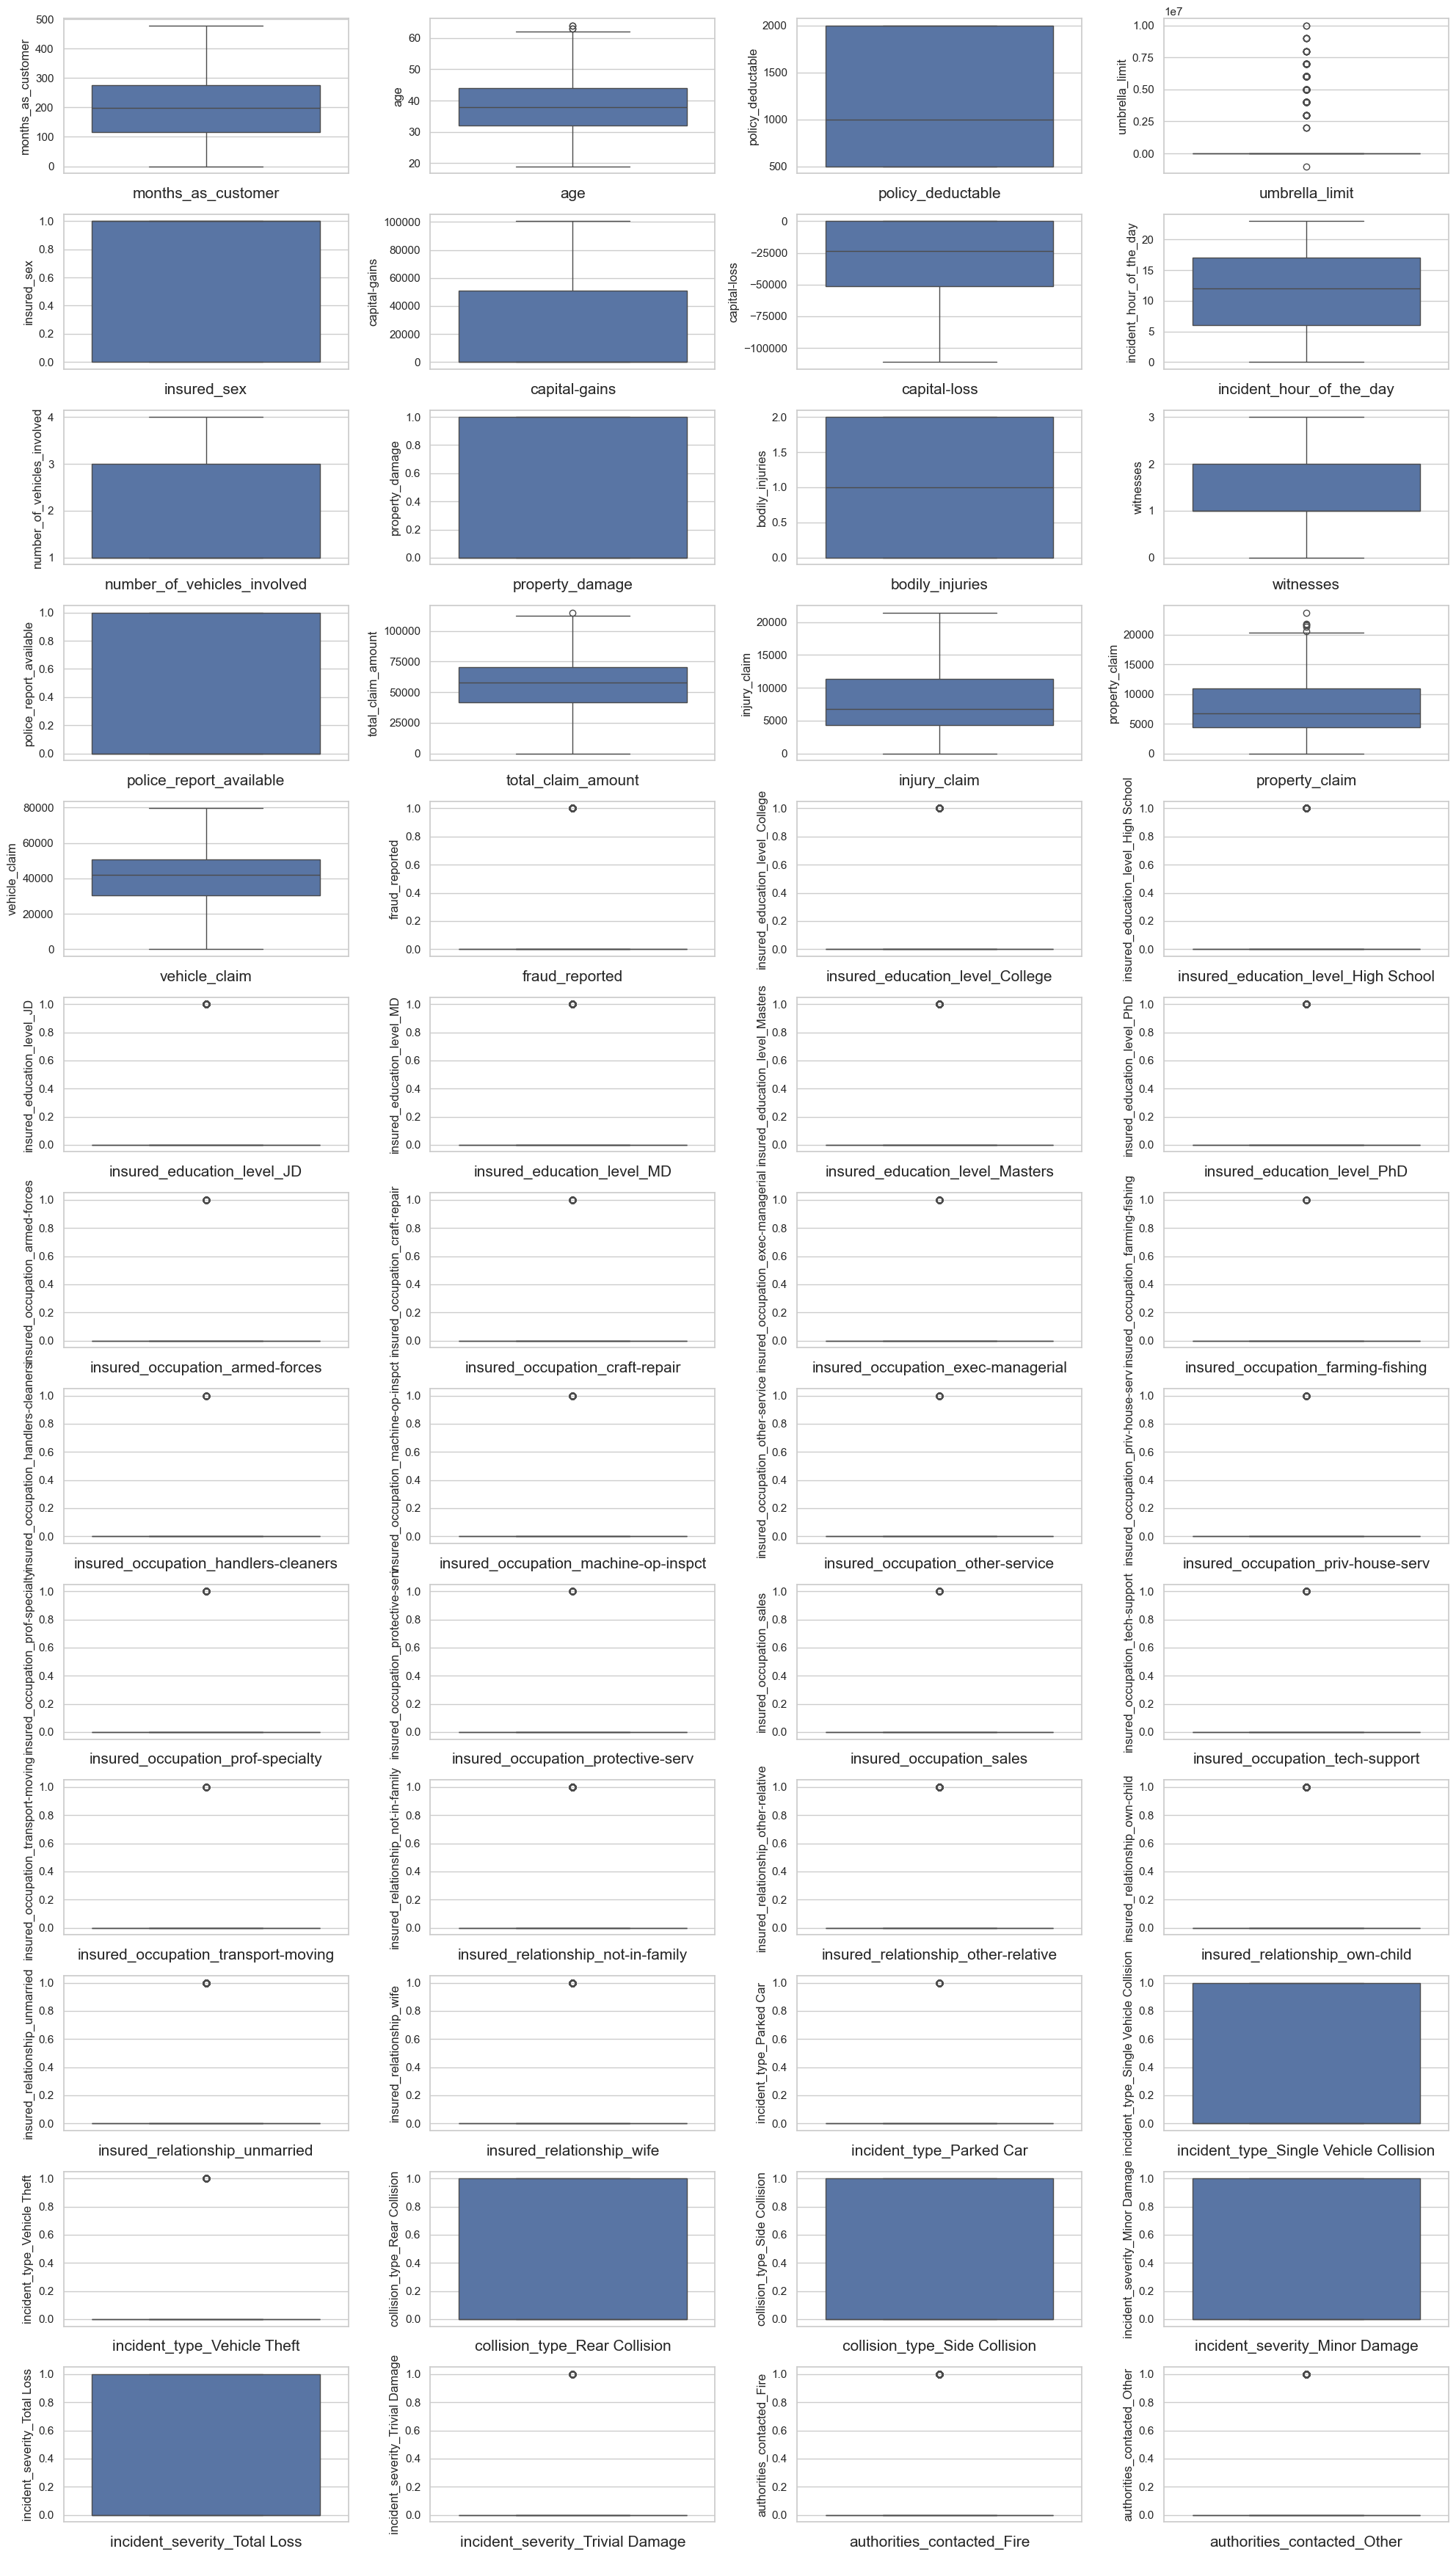

In [37]:
plt.figure(figsize=(20,35))
plotnumber=1
for col in df.columns:
    if plotnumber <= 52:
        ax=plt.subplot(13,4,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [38]:
numerical_data=df[['months_as_customer','policy_deductable','umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day','number_of_vehicles_involved','bodily_injuries','witnesses','injury_claim','property_claim','vehicle_claim']]

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)
scaled_num_df = pd.DataFrame(data=scaled_data, columns=numerical_data.columns, index=numerical_data.index)
scaled_num_df

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0              1.078140          -0.222383       -0.479476       1.011331   
1              0.208995           1.412784        1.697980      -0.901927   
2             -0.608002           1.412784        1.697980       0.358023   
3              0.452355           1.412784        2.133471       0.853388   
4              0.208995          -0.222383        2.133471       1.467210   
..                  ...                ...             ...            ...   
995           -1.746582          -0.222383       -0.479476      -0.901927   
996            0.704407          -0.222383       -0.479476       1.643100   
997           -0.642767          -1.039966        0.826998       0.358023   
998            2.208028           1.412784        1.697980      -0.901927   
999            2.190645          -0.222383       -0.479476      -0.901927   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0        0.953851                 -0.956261                    -0.823865   
1        0.953851                 -0.524475                    -0.823865   
2        0.953851                 -0.668404                     1.140056   
3       -1.267577                 -0.956261                    -0.823865   
4       -0.683741                  1.202666                    -0.823865   
..            ...                       ...                          ...   
995      0.953851                  1.202666                    -0.823865   
996      0.953851                  1.634452                    -0.823865   
997      0.953851                 -1.100189                     1.140056   
998      0.953851                 -1.388046                    -0.823865   
999      0.953851                 -0.812332                    -0.823865   

     bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  
0           0.009759   0.461838     -0.189283        1.165505       0.749653  
1          -1.210174  -1.338700     -1.363822       -1.372696      -1.823346  
2           1.229693   1.362107      0.054644       -0.736072      -0.785565  
3           0.009759   0.461838     -0.224130       -0.219722       0.677607  
4          -1.210174  -0.438431     -1.257232       -1.399654      -1.768252  
..               ...        ...           ...             ...            ...  
995        -1.210174  -0.438431      2.051155        0.273817       1.224309  
996         1.229693   1.362107      2.182342        2.214794       1.821868  
997         1.229693   1.362107      0.013648        0.020826       0.771902  
998        -1.210174  -0.438431     -0.453708       -0.451976      -0.073580  
999        -1.210174   1.362107     -1.429416       -1.343664      -1.814340  

[1000 rows x 12 columns]

In [40]:
df.drop(columns=scaled_num_df.columns,inplace=True)
df=pd.concat([scaled_num_df,df],axis=1)
df

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0              1.078140          -0.222383       -0.479476       1.011331   
1              0.208995           1.412784        1.697980      -0.901927   
2             -0.608002           1.412784        1.697980       0.358023   
3              0.452355           1.412784        2.133471       0.853388   
4              0.208995          -0.222383        2.133471       1.467210   
..                  ...                ...             ...            ...   
995           -1.746582          -0.222383       -0.479476      -0.901927   
996            0.704407          -0.222383       -0.479476       1.643100   
997           -0.642767          -1.039966        0.826998       0.358023   
998            2.208028           1.412784        1.697980      -0.901927   
999            2.190645          -0.222383       -0.479476      -0.901927   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0        0.953851                 -0.956261                    -0.823865   
1        0.953851                 -0.524475                    -0.823865   
2        0.953851                 -0.668404                     1.140056   
3       -1.267577                 -0.956261                    -0.823865   
4       -0.683741                  1.202666                    -0.823865   
..            ...                       ...                          ...   
995      0.953851                  1.202666                    -0.823865   
996      0.953851                  1.634452                    -0.823865   
997      0.953851                 -1.100189                     1.140056   
998      0.953851                 -1.388046                    -0.823865   
999      0.953851                 -0.812332                    -0.823865   

     bodily_injuries  witnesses  injury_claim  ...  \
0           0.009759   0.461838     -0.189283  ...   
1          -1.210174  -1.338700     -1.363822  ...   
2           1.229693   1.362107      0.054644  ...   
3           0.009759   0.461838     -0.224130  ...   
4          -1.210174  -0.438431     -1.257232  ...   
..               ...        ...           ...  ...   
995        -1.210174  -0.438431      2.051155  ...   
996         1.229693   1.362107      2.182342  ...   
997         1.229693   1.362107      0.013648  ...   
998        -1.210174  -0.438431     -0.453708  ...   
999        -1.210174   1.362107     -1.429416  ...   

     incident_type_Single Vehicle Collision  incident_type_Vehicle Theft  \
0                                         1                            0   
1                                         0                            1   
2                                         0                            0   
3                                         1                            0   
4                                         0                            1   
..                                      ...                          ...   
995                                       1                            0   
996                                       1                            0   
997                                       0                            0   
998                                       1                            0   
999                                       0                            0   

     collision_type_Rear Collision  collision_type_Side Collision  \
0                                0                              1   
1                                1                              0   
2                                1                              0   
3                                0                              0   
4                                1                              0   
..                             ...                            ...   
995                              0                              0   
996                              1                   

In [41]:
df['fraud_reported'].value_counts()

fraud_reported
0    753
1    247
Name: count, dtype: int64

In [42]:
df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim', 'age', 'insured_sex',
       'property_damage', 'police_report_available', 'total_claim_amount',
       'fraud_reported', 'insured_education_level_College',
       'insured_education_level_High School', 'insured_education_level_JD',
       'insured_education_level_MD', 'insured_education_level_Masters',
       'insured_education_level_PhD', 'insured_occupation_armed-forces',
       'insured_occupation_craft-repair', 'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       

### outliers detection

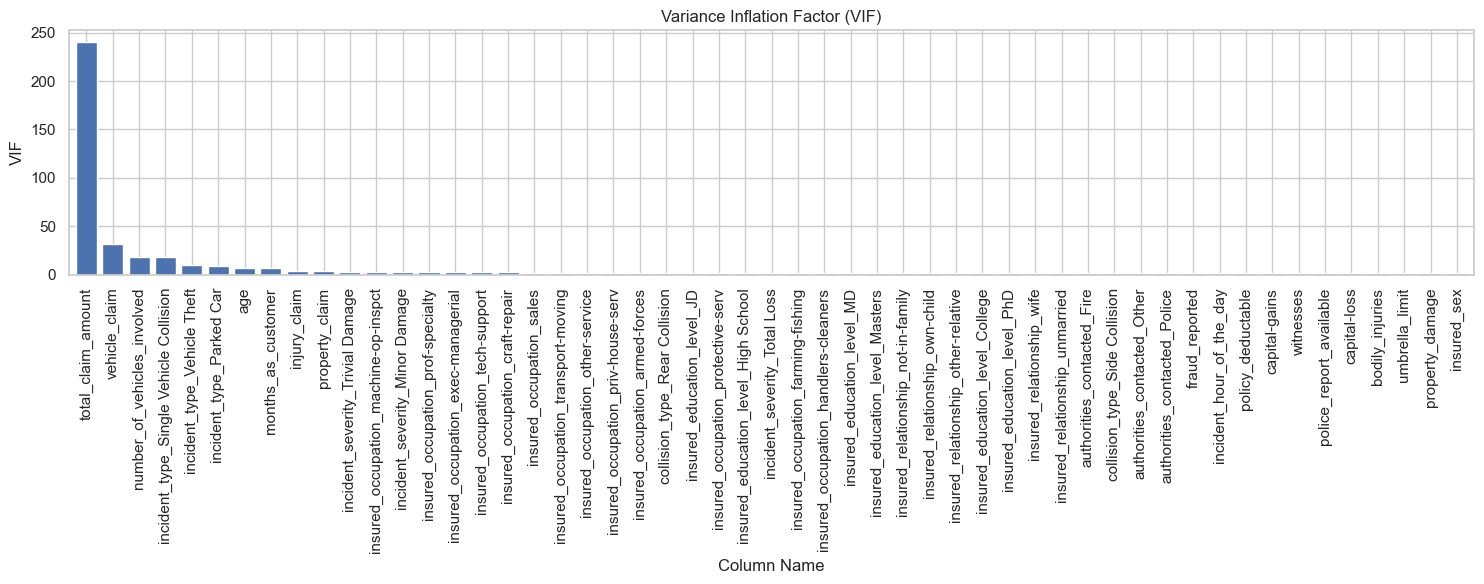

In [43]:
vif_list = []
for idx in range(df.shape[1]):
    vif = variance_inflation_factor(df.values, idx)
    vif_list.append(vif)

s1 = pd.Series(vif_list, index=df.columns).sort_values(ascending =False)

# Create a bar plot
plt.figure(figsize=(15, 6))  # Adjust the figure size as per your requirement
s1.plot(kind='bar', width=0.8)  # Adjust the width of the bars as per your requirement
plt.xlabel('Column Name')
plt.ylabel('VIF')
plt.title('Variance Inflation Factor (VIF)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()



In [44]:
s1.sort_values(ascending =True)

insured_sex                                 1.036209
property_damage                             1.037257
umbrella_limit                              1.048886
bodily_injuries                             1.051715
capital-loss                                1.053568
police_report_available                     1.058932
witnesses                                   1.063160
capital-gains                               1.066227
policy_deductable                           1.070251
incident_hour_of_the_day                    1.127902
fraud_reported                              1.432471
authorities_contacted_Police                1.499315
authorities_contacted_Other                 1.548401
collision_type_Side Collision               1.607671
authorities_contacted_Fire                  1.617467
insured_relationship_unmarried              1.679066
insured_relationship_wife                   1.710817
insured_education_level_PhD                 1.740391
insured_education_level_College             1.

In [45]:
df["umbrella_limit"].value_counts()

umbrella_limit
-0.479476    798
 2.133471     57
 1.697980     46
 1.262489     39
 2.568963     29
 0.826998     12
 3.004454      8
 3.439945      5
 0.391507      3
 3.875436      2
-0.914967      1
Name: count, dtype: int64

In [46]:
x = df.drop('fraud_reported',axis = 1)
y = df['fraud_reported']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 4,test_size = 0.2, stratify=y)


In [48]:
ln_reg = LinearRegression()
ln_reg.fit(x_train,y_train)

LinearRegression()

## Training data evaluation

In [49]:
y_pred_train = ln_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

r_squared = r2_score(y_train, y_pred_train)
print("R-Squared :",r_squared)

MSE : 0.1280129990564739
RMSE: 0.35778904267245787
R-Squared : 0.31265881912024485


## Testing data evaluation

In [50]:
y_pred = ln_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

r_squared = r2_score(y_test, y_pred)
print("R-Squared :",r_squared)

MSE : 0.14432120848805097
RMSE: 0.37989631281186576
R-Squared : 0.21977992437869465


## normality

<Axes: xlabel='fraud_reported', ylabel='Density'>

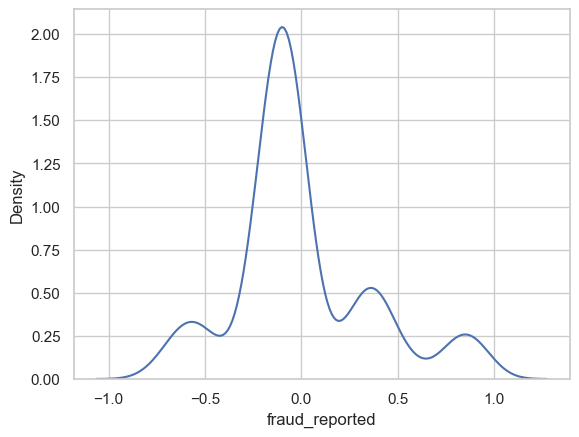

In [51]:
residual = y_train- y_pred_train
sns.kdeplot(residual)

<Axes: xlabel='fraud_reported', ylabel='Count'>

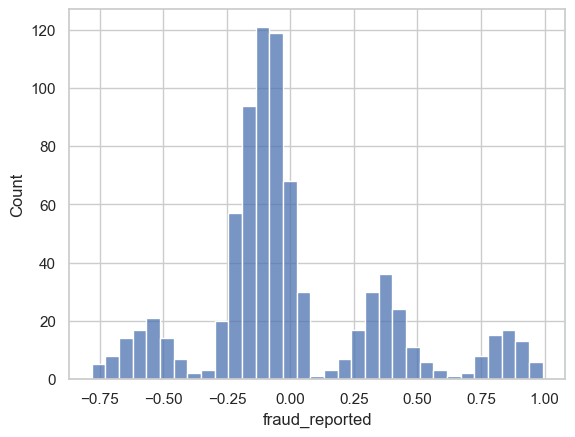

In [52]:
sns.histplot(residual)

## Logistic regression

In [53]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

## Testing data evaluation

In [54]:
y_pred_train = log_reg.predict(x_train)
cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("COnfusion Matrix\n",cnf_matrix )

print("*"*50)
acc_score = accuracy_score(y_train, y_pred_train)
print('Accuracy :',acc_score)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report :\n",clf_report)

COnfusion Matrix
 [[567  35]
 [135  63]]
**************************************************
Accuracy : 0.7875
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       602
           1       0.64      0.32      0.43       198

    accuracy                           0.79       800
   macro avg       0.73      0.63      0.65       800
weighted avg       0.77      0.79      0.76       800



In [55]:
y_pred = log_reg.predict(x_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
print("COnfusion Matrix\n",cnf_matrix )

print("*"*50)
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy :',acc_score)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n",clf_report)

COnfusion Matrix
 [[141  10]
 [ 31  18]]
**************************************************
Accuracy : 0.795
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       151
           1       0.64      0.37      0.47        49

    accuracy                           0.80       200
   macro avg       0.73      0.65      0.67       200
weighted avg       0.78      0.80      0.77       200



## KNN 

In [56]:
knn_reg =  KNeighborsRegressor(n_neighbors=5, p=2)
knn_reg.fit(x_train, y_train)

KNeighborsRegressor()

In [57]:
knn_reg.score(x_train, y_train)

0.23863216886472682

In [58]:
knn_reg.score(x_test, y_test)

-0.226111636707663

In [59]:

knn_clf=KNeighborsClassifier(n_neighbors=30)
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [60]:
y_pred_train = knn_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :", accuracy)
print("*"*50)

Confusion Matrix :
 [[602   0]
 [198   0]]
**************************************************
Accuracy : 0.7525
**************************************************


In [66]:
y_pred = knn_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n",cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :", accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report :\n", clf_report)

Confusion Matrix :
 [[151   0]
 [ 49   0]]
**************************************************
Accuracy : 0.755
**************************************************
Classification Report :
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



Text(0, 0.5, 'Accuracy')

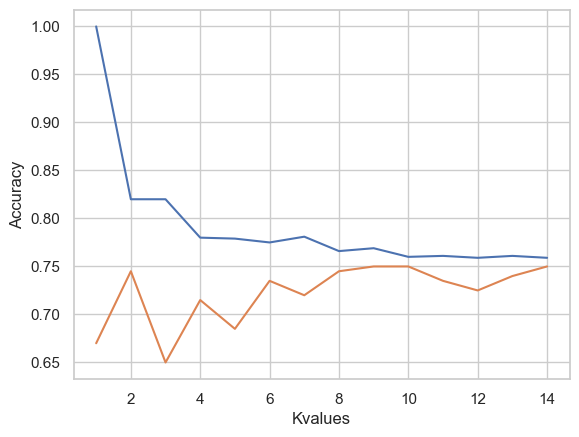

In [61]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 2) # Euclidean Distance
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train),3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test),3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Accuracy')

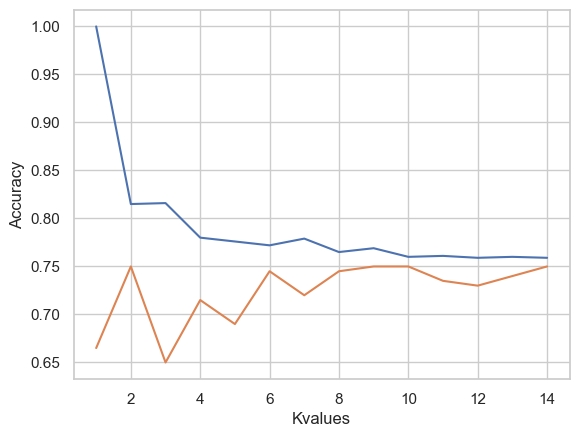

In [62]:
k_values = np.arange(1,15)
train_acc_list = []
test_acc_list = []
for k in k_values:
    knn_clf = KNeighborsClassifier(n_neighbors=k, p = 1) # Euclidean Distance
    knn_clf.fit(x_train, y_train)
    train_acc_list.append(np.around(knn_clf.score(x_train, y_train),3))
    test_acc_list.append(np.around(knn_clf.score(x_test, y_test),3))

plt.plot(k_values, train_acc_list)
plt.plot(k_values, test_acc_list)

plt.xlabel("Kvalues")
plt.ylabel("Accuracy")

## 4. Decision tree classification

In [63]:
dt_clf = DecisionTreeClassifier(random_state=4)
dt_clf.fit(x_train, y_train)
print('Train Accuracy :',dt_clf.score(x_train, y_train))
print("Test Accuracy  :",dt_clf.score(x_test, y_test))
plt.figure(figsize = (100,90))
tree = plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('insurace_fruad.png')

Train Accuracy : 1.0
Test Accuracy  : 0.715


In [64]:
dt_clf = DecisionTreeClassifier(criterion='gini',random_state=4)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=4)

In [65]:
dt_clf.score(x_train, y_train)

1.0

In [66]:
dt_clf.score(x_test, y_test)

0.715

## Evaluation

In [68]:
# Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print('*'*50)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print('*'*50)
clf_report = classification_report(y_train, y_pred_train)
print('Classification report :\n',clf_report)

Confusion Matrix:
 [[602   0]
 [  0 198]]
**************************************************
Accuracy : 1.0
**************************************************
Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       602
           1       1.00      1.00      1.00       198

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



In [69]:
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)
print('*'*50)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print('*'*50)
clf_report = classification_report(y_test, y_pred)
print('Classification report :\n',clf_report)

Confusion Matrix:
 [[121  30]
 [ 27  22]]
**************************************************
Accuracy : 0.715
**************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.42      0.45      0.44        49

    accuracy                           0.71       200
   macro avg       0.62      0.63      0.62       200
weighted avg       0.72      0.71      0.72       200



In [70]:
dt_clf.feature_importances_

array([0.0565457 , 0.00805396, 0.01648774, 0.01616659, 0.04978286,
       0.04707732, 0.02504611, 0.00776632, 0.02843016, 0.02443428,
       0.06604181, 0.18859634, 0.07663556, 0.01551133, 0.00836775,
       0.        , 0.02722218, 0.        , 0.00447442, 0.        ,
       0.00335582, 0.        , 0.01523981, 0.        , 0.01348138,
       0.00668979, 0.00920162, 0.        , 0.00451437, 0.        ,
       0.        , 0.00894885, 0.        , 0.00412499, 0.00604047,
       0.00074168, 0.00894885, 0.        , 0.        , 0.03970385,
       0.00293057, 0.        , 0.00838954, 0.        , 0.        ,
       0.00447442, 0.06466354, 0.09562157, 0.        , 0.00298295,
       0.02123809, 0.01206738])

<Axes: >

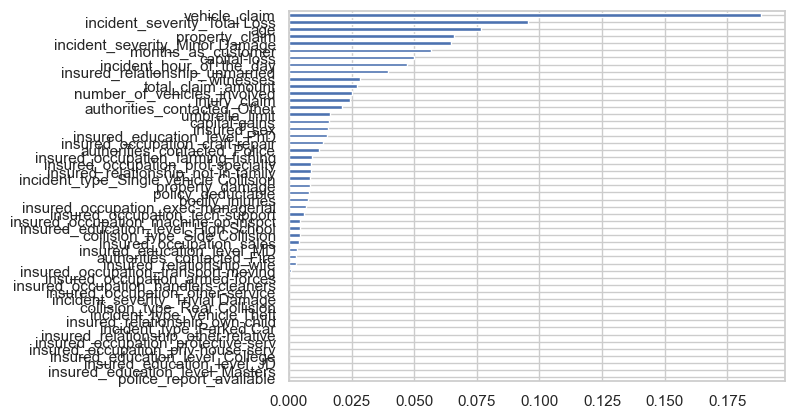

In [71]:
s1 = pd.Series(dt_clf.feature_importances_, index= x.columns)
s1.sort_values().plot(kind = 'barh')

In [72]:
s1.sort_values(ascending = False)

vehicle_claim                             0.188596
incident_severity_Total Loss              0.095622
age                                       0.076636
property_claim                            0.066042
incident_severity_Minor Damage            0.064664
months_as_customer                        0.056546
capital-loss                              0.049783
incident_hour_of_the_day                  0.047077
insured_relationship_unmarried            0.039704
witnesses                                 0.028430
total_claim_amount                        0.027222
number_of_vehicles_involved               0.025046
injury_claim                              0.024434
authorities_contacted_Other               0.021238
umbrella_limit                            0.016488
capital-gains                             0.016167
insured_sex                               0.015511
insured_education_level_PhD               0.015240
insured_occupation_craft-repair           0.013481
authorities_contacted_Police   

## Hyperparameter Tuning 

In [73]:
dt_model = DecisionTreeClassifier(random_state=4)

hyp_grid = {
            "criterion" :['gini','entropy'],
            "max_depth" : np.arange(3,7),
            "min_samples_split" : range(8,13),
            "min_samples_leaf" : range(3,8)}

gscv_dt_model = GridSearchCV(dt_model,param_grid = hyp_grid, cv = 3,n_jobs  = -1)
gscv_dt_model.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6]),
                         'min_samples_leaf': range(3, 8),
                         'min_samples_split': range(8, 13)})

In [74]:
dt_clf = DecisionTreeClassifier(criterion='entropy',min_samples_split=20, min_samples_leaf=5 ,random_state=4)
dt_clf.fit(x_train, y_train)
print('Train Accuracy :',dt_clf.score(x_train, y_train))
print("Test Accuracy  :",dt_clf.score(x_test, y_test))

Train Accuracy : 0.88625
Test Accuracy  : 0.72


In [75]:
gscv_dt_model.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=3, min_samples_split=11,
                       random_state=4)

In [76]:
dt_clf = gscv_dt_model.best_estimator_
dt_clf.fit(x_train, y_train)
print('Train Accuracy :',dt_clf.score(x_train, y_train))
print("Test Accuracy  :",dt_clf.score(x_test, y_test))
plt.figure(figsize = (100,90))
tree = plot_tree(dt_clf, feature_names=x.columns, class_names=['0','1'], filled=True)
plt.savefig('DT_clf_test.png')

Train Accuracy : 0.8175
Test Accuracy  : 0.81


In [77]:
# Training Data Evaluation
y_pred_train = dt_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print('*'*50)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy :",accuracy)
print('*'*50)
clf_report = classification_report(y_train, y_pred_train)
print('Classification report :\n',clf_report)

Confusion Matrix:
 [[514  88]
 [ 58 140]]
**************************************************
Accuracy : 0.8175
**************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       602
           1       0.61      0.71      0.66       198

    accuracy                           0.82       800
   macro avg       0.76      0.78      0.77       800
weighted avg       0.83      0.82      0.82       800



In [78]:
y_pred = dt_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)
print('*'*50)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy :",accuracy)
print('*'*50)
clf_report = classification_report(y_test, y_pred)
print('Classification report :\n',clf_report)

Confusion Matrix:
 [[129  22]
 [ 16  33]]
**************************************************
Accuracy : 0.81
**************************************************
Classification report :
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       151
           1       0.60      0.67      0.63        49

    accuracy                           0.81       200
   macro avg       0.74      0.76      0.75       200
weighted avg       0.82      0.81      0.81       200



## Random forest

In [84]:
rf_reg = RandomForestRegressor(random_state = 4)
rf_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=4)

In [85]:
rf_reg.feature_importances_

array([0.06149925, 0.01242032, 0.02064288, 0.03096975, 0.037731  ,
       0.04166596, 0.01217433, 0.01408988, 0.01684266, 0.0617491 ,
       0.07847829, 0.08500157, 0.04468636, 0.00483464, 0.00668671,
       0.0048251 , 0.06835463, 0.00650094, 0.00983841, 0.00713974,
       0.0076998 , 0.00758359, 0.00795844, 0.00586065, 0.00636902,
       0.01306717, 0.00438358, 0.00597116, 0.00479996, 0.00243991,
       0.00626193, 0.0042321 , 0.00720629, 0.00819128, 0.00510574,
       0.00494777, 0.00580875, 0.00657989, 0.0079852 , 0.01051806,
       0.0053438 , 0.00071403, 0.00466613, 0.00047576, 0.01099906,
       0.00648382, 0.07043835, 0.09703572, 0.02777818, 0.00348546,
       0.00815009, 0.00532781])

In [86]:
# Train Data Evaluation
y_pred_train = rf_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print('MAE :',mae)

r2_value = r2_score(y_train, y_pred_train)
print("R-squared Value :",r2_value)

MSE : 0.021649500000000002
RMSE : 0.14713769061664655
MAE : 0.10637500000000001
R-squared Value : 0.8837571730594986


In [87]:
# Test Data Evaluation
y_pred = rf_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE :",rmse)

mae = mean_absolute_error(y_test, y_pred)
print('MAE :',mae)

r2_value = r2_score(y_test, y_pred)
print("R-squared Value :",r2_value)

MSE : 0.14889999999999998
RMSE : 0.38587562763149474
MAE : 0.29350000000000004
R-squared Value : 0.19502635491282627


In [79]:
with open("insurance_fraud.pkl",'wb') as f:
    pickle.dump(dt_clf,f)

NameError: name 'pickle' is not defined